# The Best Neighborhood in Pittsburgh

---

### Metric
The metric we decided to base our neighborhoods off of was the Pokemon Go potential per acre. In order to determine the Pokemon Go potenial we took into account factors that would keep a player safe and allow them to get the most Pokemon. The three metrics were **Signs Per Acre**, **Verison Towers Per Acre**, and **Parks Per Acre**.

---

### Imports
First we had to import all of the math that would assist in plotting and doing complex math. We also had to import all of the datasets that we downloaded from the WPRDC. These data sets include Parks in each neighborhood, Street signs in each neighborhood, and Internet Service Providers (ISPs) per neighborhood.

In [1]:
import pandas as pd
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
park_equipment = pd.read_csv("playground_equipment.csv", index_col = "id", parse_dates=True)
signsData = pd.read_csv("Signs.csv")
hood_data = pd.read_csv("RAC223Neighborhoods_.csv")
ispdata = pd.read_csv("pittsburghispsbyblock.csv", index_col="Neighborhood")
neighborhoods = geopandas.read_file("Neighborhood/Neighborhoods_.shp")

---
### Sign Data
This data set was a list of every sign in the city of Pittsburgh. The dataset had its location, the type of sign, and then some useless stuff that is not used in this specific presentation.

After parsing through all of the code I gathered only the signs that in some way inhibit the movement of traffic. By taking only these signs it allows me to more easily decide saftey for a pedestrian.

In [11]:
signsDescData = signsData.groupby(['description']).count()
BPC = signsData.loc[signsData['description'] == 'Blind Pedestrian Crossing']
LE = signsData.loc[signsData['description'] == 'Lane Ends']
MPL = signsData.loc[signsData['description'] == 'Movement Prohibition - No Left Turn']
MPR = signsData.loc[signsData['description'] == 'Movement Prohibition - No Right Turn']
MPN = signsData.loc[signsData['description'] == 'Movement Prohibition - No Turns']
MPU = signsData.loc[signsData['description'] == 'Movement Prohibition - No U-Turns']
Y = signsData.loc[signsData['description'] == 'Yield']
YP = signsData.loc[signsData['description'] == 'Yield to Peds in Crosswalk']
WW = signsData.loc[signsData['description'] == 'Wrong Way']
WC = signsData.loc[signsData['description'] == 'Watch Children']
SL = signsData.loc[signsData['description'] == 'Speed Limit']
S = signsData.loc[signsData['description'] == 'Stop']
SH = signsData.loc[signsData['description'] == 'Stop']
SC = signsData.loc[signsData['description'] == 'School']
OW = signsData.loc[signsData['description'] == 'One Way']
newFrame = pd.concat([BPC,LE,MPL,MPR,MPN,MPU,Y,YP,WW,WC,S,SL,SH,SC,OW])

In this code block I get rid of the useless columns and I count up all of the signs per neighborhood into a new dataframe.

In [12]:
newSmallerFrame = newFrame.drop(columns=['mutcd_code','address_number','street','id','mounting_fixture','date_installed','council_district','ward', 'tract','public_works_division','pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude','city'])
signsCountData = newSmallerFrame.groupby(['neighborhood']).count()

Now I took the neighborhood dataset that had the acres and merged it with my other dataframe that had the count of signs per neighborhood. After I merged these datasets I manually added the acres of Perry North which had a 0 in its acres column in the orignal dataframe.

In [13]:
hoodDataSized = hood_data[['hood','acres']]
hoodDataSorted = hoodDataSized.sort_values(by=['hood'])
merge = pd.merge(hoodDataSorted,signsCountData, left_on='hood', right_on='neighborhood')
merge = merge.rename(columns={"description": "signCount"})
merge.at[60,'acres']=775.68

In this code block I am finding out the signage per acre by dividing the signs per the acre of the corresponding neighborhood. After that I am putting it into the array to be easily graphed.

In [19]:
newArray=[]
for x in range(90):
    newArray.append(merge.iloc[x,2]/merge.iloc[x,1])
merge['signsPerAcre'] = newArray
merge = merge.sort_values(by=['signsPerAcre'],ascending = True)
graphable = merge.drop(columns=['acres','signCount'])
smallone=graphable

Lastly I am creating a array of values from 0-100 that could be easily combined with the other datasets.

In [15]:
combiner= []
for value in graphable['signsPerAcre']:
    combiner.append((value/graphable.iloc[89,1])*100)

graphable["ScaledSignsPerAcre"] =combiner
graphableDropped = graphable.drop(columns=['signsPerAcre'])
graphableDropped = graphableDropped.sort_values(by=["hood"])

This graph depicts a bar graph that lists the Scaled Signs Per Acre in deciding order.

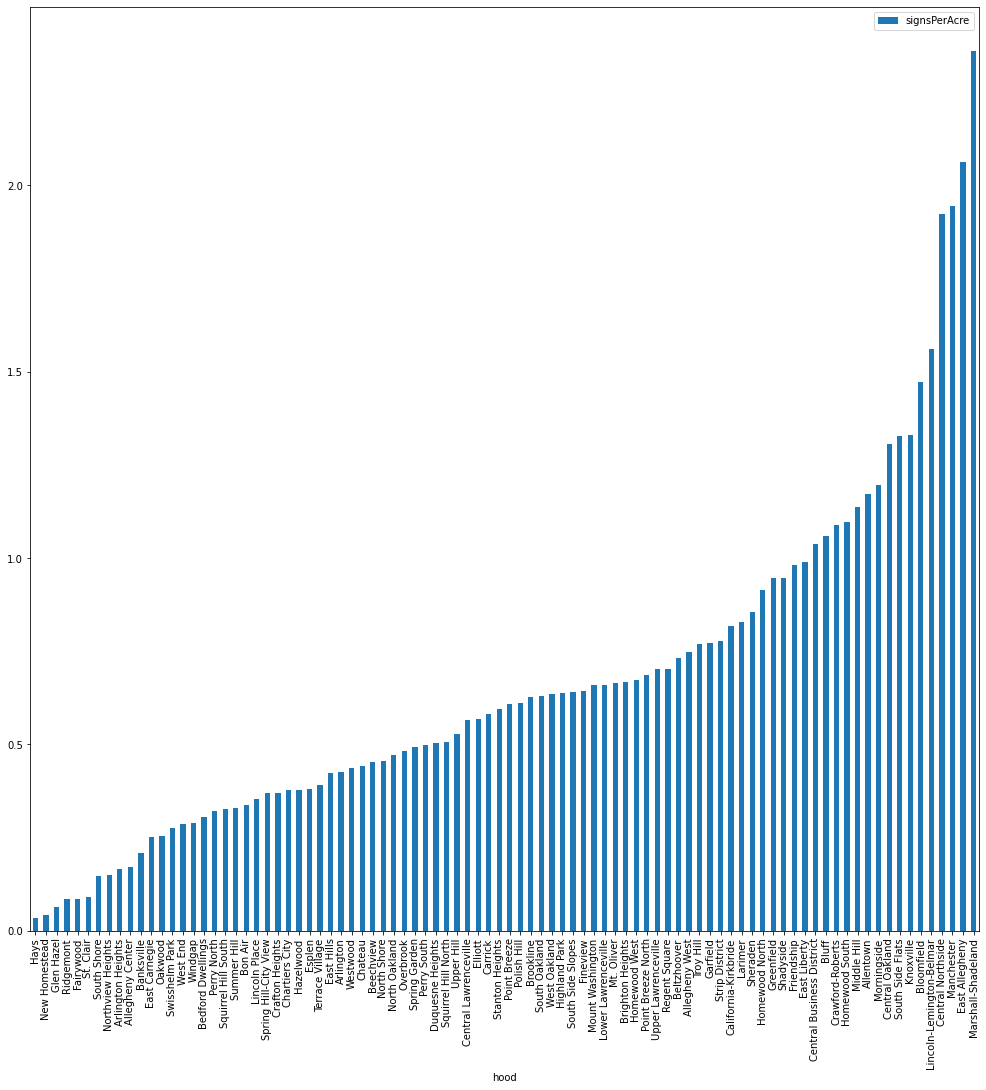

In [21]:
smallone.plot(x ='hood', y='signsPerAcre', kind = 'bar', figsize=(17, 17))

In conculusion Marshal-Shadeland is the best neighborhood for the saftey of pedestrians playing Pokemon Go because it has the highest ratio of traffic slowing signs to acres at 2.361530.

Another way to show the distrubitions of the signage per acre is with a geopandas graph depicted below.

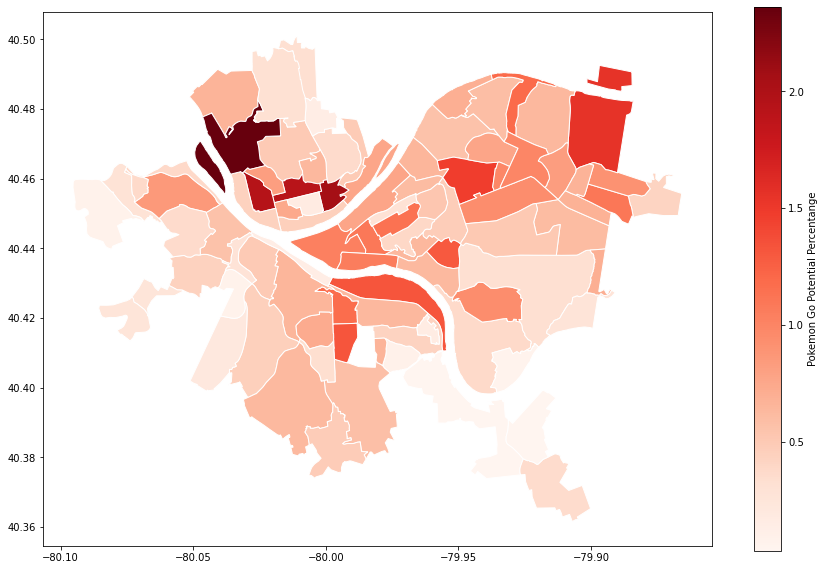

In [24]:
total_map = neighborhoods.merge(smallone, how='left', left_on='hood', right_on='hood')
total_map.plot(column='signsPerAcre',cmap='Reds',edgecolor="white",legend=True,legend_kwds={'label': "Pokemon Go Potential Percentange"},figsize=(15, 10), )

---
### Parks

I first sort each neighborhood by the amount of equipment pieces within them, creating a score based off of the size and number of parks in each neighborhood.

In [4]:
park_equipment.sort_values(by="neighborhood", ascending= True)
park_ratings = park_equipment.groupby("neighborhood")["name"].count()
park_ratings.head(10)

neighborhood
Allegheny Center     15
Allentown             4
Banksville            6
Bedford Dwellings     3
Beechview            21
Beltzhoover          10
Bloomfield            7
Bluff                 2
Bon Air               3
Brighton Heights      8
Name: name, dtype: int64

Here I create a new dataset of the neighborhoods for every time they have a piece of equipment that is handicap accessible. I then have a loop that adds 2 to the score in the previous code block for each piece of handicap accessible equipment, creating a new rating for each neighborhood. This is important to the metric because handicap accessible park equipment allows for more inclusion for all to play.

In [6]:
handicap = park_equipment.sort_values(by=['neighborhood'])
handicap = handicap[['ada_accessible', 'neighborhood']]
newarray = []
for x in range(len(handicap)):
    if handicap.iloc[x, 0] == "t":
        newarray.append(handicap.iloc[x, 1])
print(newarray)
for value in newarray:
    park_ratings[value] += 2
    
print(park_ratings)

['Allegheny Center', 'Allentown', 'Banksville', 'Bedford Dwellings', 'Beechview', 'Beechview', 'Beechview', 'Beechview', 'Beltzhoover', 'Beltzhoover', 'Bloomfield', 'Bloomfield', 'Bluff', 'Bon Air', 'Brighton Heights', 'Brighton Heights', 'Carrick', 'Carrick', 'Central Lawrenceville', 'Crafton Heights', 'Crawford-Roberts', 'Crawford-Roberts', 'Duquesne Heights', 'East Carnegie', 'East Liberty', 'East Liberty', 'Elliott', 'Elliott', 'Elliott', 'Elliott', 'Fairywood', 'Fineview', 'Fineview', 'Garfield', 'Greenfield', 'Greenfield', 'Hazelwood', 'Hazelwood', 'Highland Park', 'Highland Park', 'Highland Park', 'Homewood North', 'Homewood West', 'Lincoln Place', 'Lincoln-Lemington-Belmar', 'Lincoln-Lemington-Belmar', 'Lower Lawrenceville', 'Manchester', 'Manchester', 'Marshall-Shadeland', 'Middle Hill', 'Morningside', 'Morningside', 'Mount Washington', 'Mount Washington', 'Mount Washington', 'New Homestead', 'Oakwood', 'Perry North', 'Perry South', 'Point Breeze North', 'Polish Hill', 'Regent

I then take the ratings from each neighborhood and divide it by the acres, used from the neighborhood dataset, in order to judge it based on the density of the parks. I then sort the density park ratings from least to greatest and create a bar graph to show the distributions.

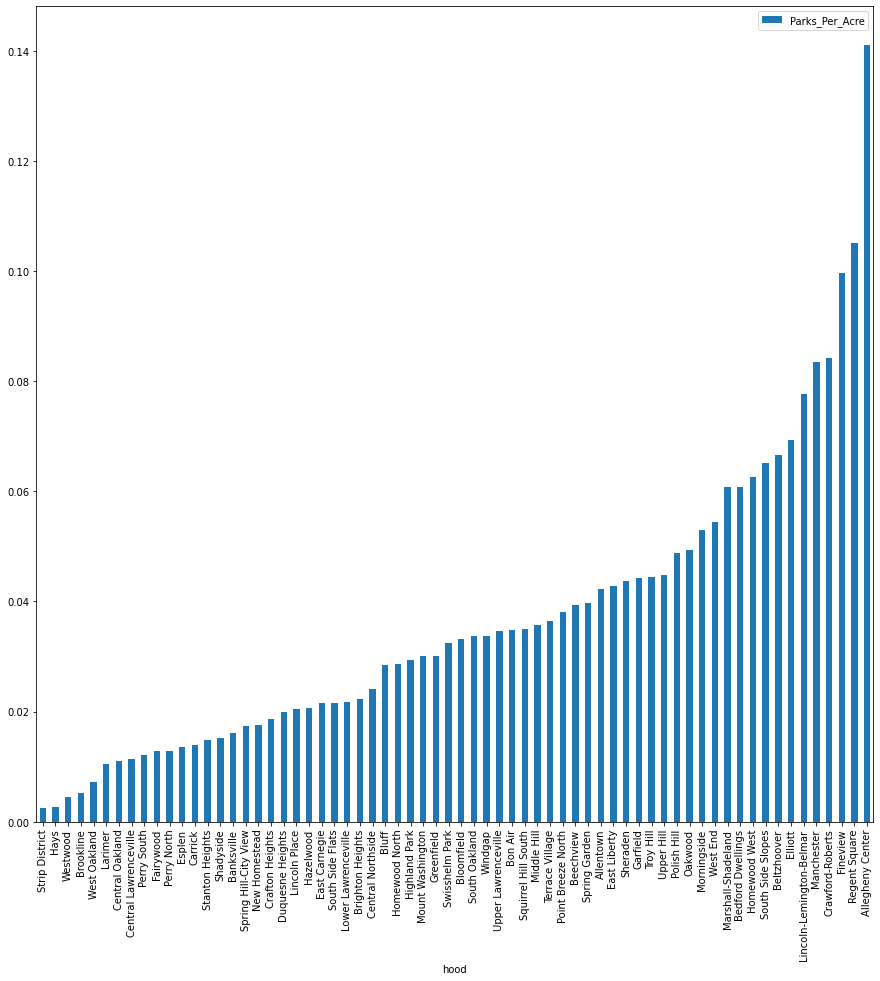

In [8]:
park_ratings = park_ratings.sort_values()
hood_data = hood_data[['hood', 'acres']]
hood_data = hood_data.sort_values(by=['hood'])
merge = pd.merge(hood_data, park_ratings, left_on = 'hood', right_on = 'neighborhood')
merge.at[42, 'acres'] = 775.68
park_acres = []
for x in range(66):
    park_acres.append(merge.iloc[x, 2] / merge.iloc[x, 1])
merge['Parks_Per_Acre'] = park_acres
graphable = merge.drop(columns = ['acres', 'name'])
graphable = graphable.sort_values(by = ['Parks_Per_Acre'])
graphable.plot(x = 'hood', y = 'Parks_Per_Acre', kind = 'bar', figsize = (15, 15))

The greatest neighborhood for Parks-per-acre for Pokemon-Go is Allegheny Center. Another depiction of the distributions is shown below with a geopandas map plot.

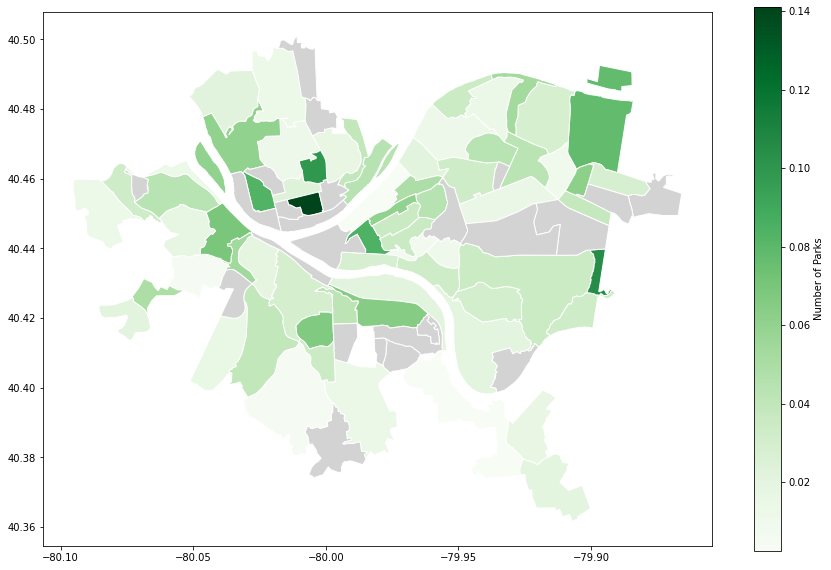

In [9]:
neighborhood_map = geopandas.read_file("Neighborhood/Neighborhoods_.shp")
playground_map = neighborhood_map.merge(graphable, how = "left", left_on = 'hood', right_on = 'hood')
playground_map.plot(column='Parks_Per_Acre', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Finally, I have to scale the park data into a weighted system in order to be combined with the other datasets. To do so, I have to divide all of my ratings per acre by the highest, Allegheny Center, to create a new Scale from 0 to 100%.

In [10]:
park_scale = []
for value in graphable['Parks_Per_Acre']:
    park_scale.append((value/graphable.iloc[65, 1]) * 100)
graphable["ScaledParks"] = park_scale
dropped_graphable = graphable.drop(columns=['Parks_Per_Acre'])
dropped_graphable = dropped_graphable.sort_values(by=["hood"])
dropped_graphable

,hood,ScaledParks
0,Allegheny Center,100.000000
1,Allentown,29.912795
2,Banksville,11.381306
3,Bedford Dwellings,43.059922
4,Beechview,27.941548
...,...,...
61,Upper Lawrenceville,24.508135
62,West End,38.566838
63,West Oakland,5.123603
64,Westwood,3.186287


---
### Internet Service

One of the most important things needed to play Pokemon Go well is internet. Without access to the internet in some way, there is no way to access your endless supply of Pokemon. We took it upon ourselves to determine that Verizon is the best internet service provider in terms of coverage and 5G support, meaning that **the more Verizon ISPs per acre, the better the neighborhood**. 

When looking at the raw data for the ISP data, there is a lot of unnecessary data that benefits nothing towards this project. This data includes ISPs that are not owned by Verizon, logging numbers, provider names, and objectively useless numbers for our set. The first thing I did was make an array of each of the useless columns and drop them from the data set

In [3]:
ispdata = ispdata.sort_values(by=["Neighborhood"])
thislist = ["GEOID", "LogRecNo", "Provider_Id", "FRN", "ProviderName", "DBAName", "HocoNum", "StateAbbr", "BlockCode", "TechCode", "Consumer", "MaxAdDown", "MaxAdUp", "Business", "MaxCIRDown", "MaxCIRUp", "HocoFinal"]
ispdata = ispdata.drop(axis=1,labels=thislist)
ispdata

,HoldingCompanyName
Neighborhood,
Allegheny Center,"ViaSat, Inc."
Allegheny Center,"General Communication, Inc."
Allegheny Center,"General Communication, Inc."
Allegheny Center,"General Communication, Inc."
Allegheny Center,"General Communication, Inc."
...,...
Windgap,Comcast Corporation
Windgap,Comcast Corporation
Windgap,Comcast Corporation


Next, I isolate all of the entries with Verizon ISPs and put those into a new data set, grouped alphabetically by neighborhood, listing the number of ISPs per neighborhood

In [6]:
query_mask = ispdata['HoldingCompanyName'] == 'Verizon Communications Inc.'
verizon = ispdata[query_mask]
verizon = verizon.groupby("Neighborhood").count()
verizon

,HoldingCompanyName
Neighborhood,
Allegheny Center,18
Allegheny West,36
Allentown,187
Arlington,108
Arlington Heights,5
...,...
Upper Lawrenceville,127
West End,54
West Oakland,54


Next, I made another data set with the acreage of each neighborhood in the dataset

In [7]:
hooddata = hood_data[['hood', 'acres']]
hooddata = hooddata.sort_values(by=['hood'])
hooddata

,hood,acres
13,Allegheny Center,134.703
11,Allegheny West,90.841
62,Allentown,189.608
67,Arlington,302.320
71,Arlington Heights,84.592
...,...,...
55,Upper Lawrenceville,260.349
89,West End,128.679
38,West Oakland,138.372
73,Westwood,445.009


This is where the fun begins. Here, I made a new dataset to merge the "hooddata" and "verizon" sets, which then calculates the average ISPs per Acre for each neighborhood in the set

In [9]:
merged = pd.merge(hooddata, verizon, left_on="hood", right_on="Neighborhood")
merged.at[60, "acres"] = 775.68

newarray = []
for x in range(90):
    newarray.append(merged.iloc[x, 2]/merged.iloc[x, 1])

merged["ISPs-Per-Acre"] = newarray
merged

,hood,acres,HoldingCompanyName,ISPs-Per-Acre
0,Allegheny Center,134.703,18,0.133627
1,Allegheny West,90.841,36,0.396297
2,Allentown,189.608,187,0.986245
3,Arlington,302.320,108,0.357237
4,Arlington Heights,84.592,5,0.059107
...,...,...,...,...
85,Upper Lawrenceville,260.349,127,0.487807
86,West End,128.679,54,0.419649
87,West Oakland,138.372,54,0.390252
88,Westwood,445.009,107,0.240445


Here, I graph the data to show which neighborhood has the most ISPs per Acre. With these calculations, the best neighborhood for our metric is Marshall-Shadeland

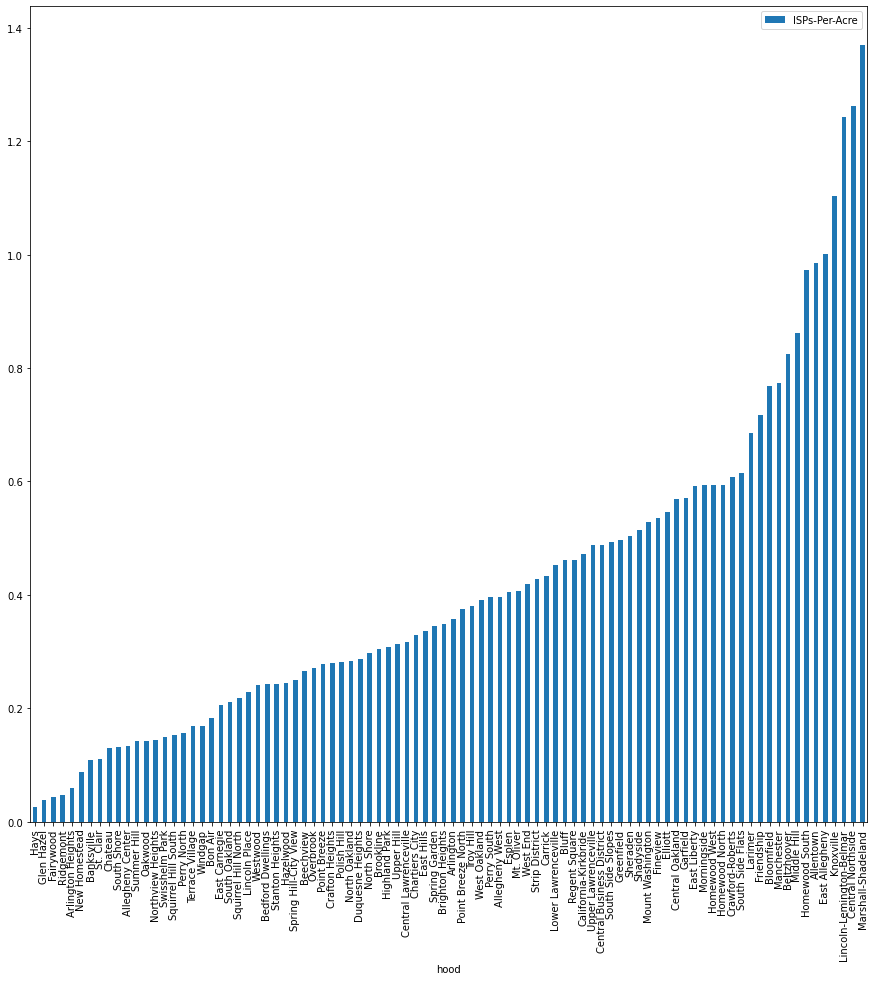

In [10]:
graphable = merged.drop(columns = ["HoldingCompanyName", "acres"])
graphable = graphable.sort_values(by=["ISPs-Per-Acre"])
graphable.plot(x="hood", y="ISPs-Per-Acre", kind="bar", figsize=(15,15))

Here is the geopandas version of the data, with the darker blue being the better neighborhoods in terms of ISPs per Acre.

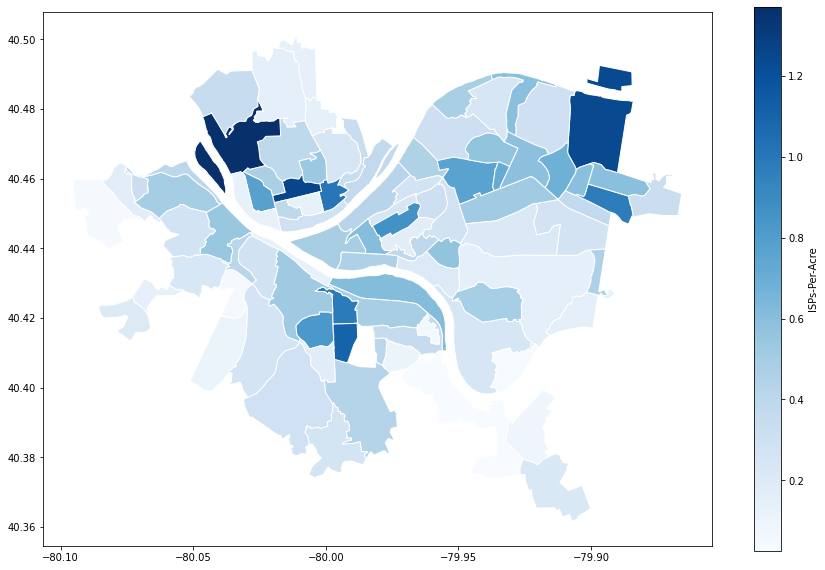

In [11]:
neighborhoods = geopandas.read_file("Neighborhood/Neighborhoods_.shp") # read in the shapefile
sign_map = neighborhoods.merge(graphable, how='left', left_on='hood', right_on='hood')
sign_map.plot(column='ISPs-Per-Acre', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "ISPs-Per-Acre"}, # label the legend
               figsize=(15, 10),         # set the size
              # missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


Finally, I convert my data into a form that can be combined with the rest of the data for our project to get a final answer for the project and determine which neighborhood is the best for safely playing Pokemon Go.

In [ ]:
combiner=[]
for value in graphable["ISPs-Per-Acre"]:
    combiner.append((value/graphable.iloc[89,1])*100)
graphable["Scaled"] = combiner
ISPDrop = graphable.drop(columns=['ISPs-Per-Acre'])
ISPDrop = ISPDrop.sort_values(by=["hood"])

---
## Final Results

Here, we combine all three of our modified datasets to fit together into one dataset that takes all three personal metrics into account, making our final metric of ***Neighborhood Goodness***. 

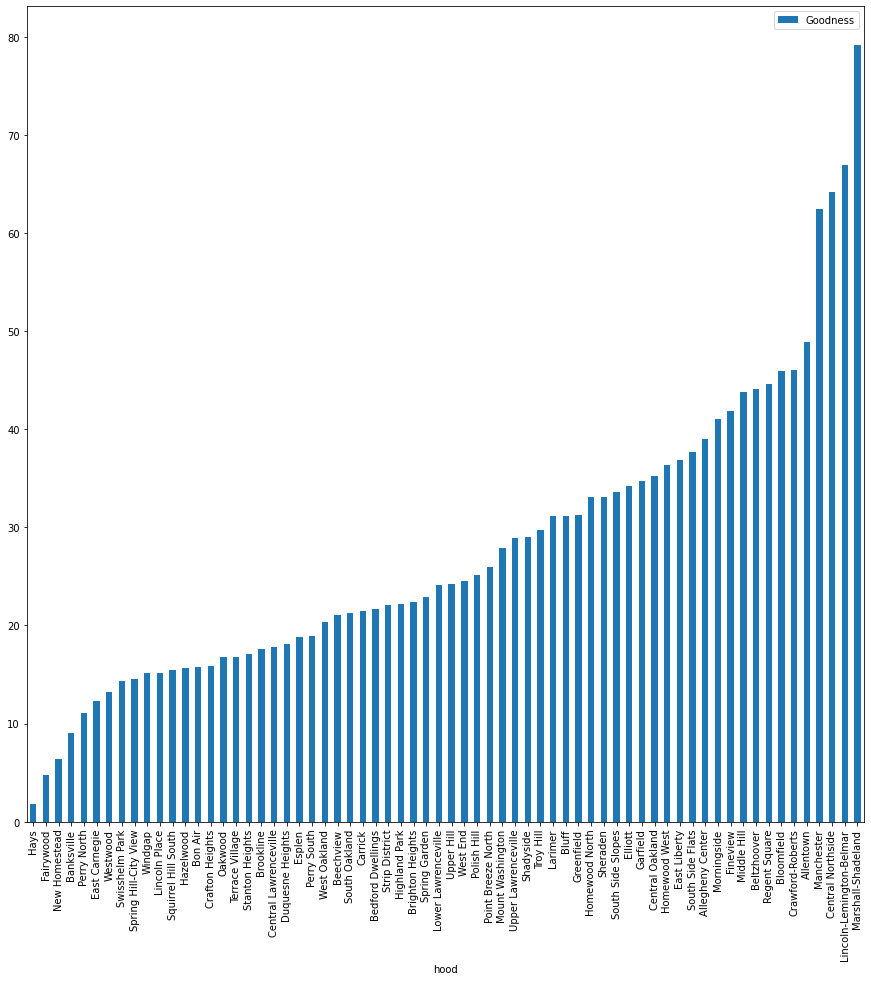

In [42]:
newFrame= ISPDrop.merge(graphableDropped)
newFrame= newFrame.merge(dropped_graphable)
average=[]
for x in range(len(newFrame)):
    average.append((newFrame.iloc[x,1]+newFrame.iloc[x,2]+newFrame.iloc[x,3])/3)
newFrame["Goodness"]= average
avOnly = newFrame.drop(columns= ['Scaled','ScaledParks', 'ScaledSignsPerAcre'])
avOnly = avOnly.sort_values(by=['Goodness'])
avOnly.plot(x='hood', y='Goodness',kind='bar', figsize=(15,15))

As the graph above shows, Marshall-Shadeland is the best neighborhood to play Pokemon Go in! Marshall-Shadeland wins because it has the most Verizon ISPs per Acre, the most Signs per Acre, and the most Parks per Acre. This gives you the combined best internet connection, least chance of getting hit by a car, and best Pokestop spots in all of Pittsburgh. Below is another geopandas map of our "Pokemon Go Potential Percentage" for each neighborhood that we looked at. 

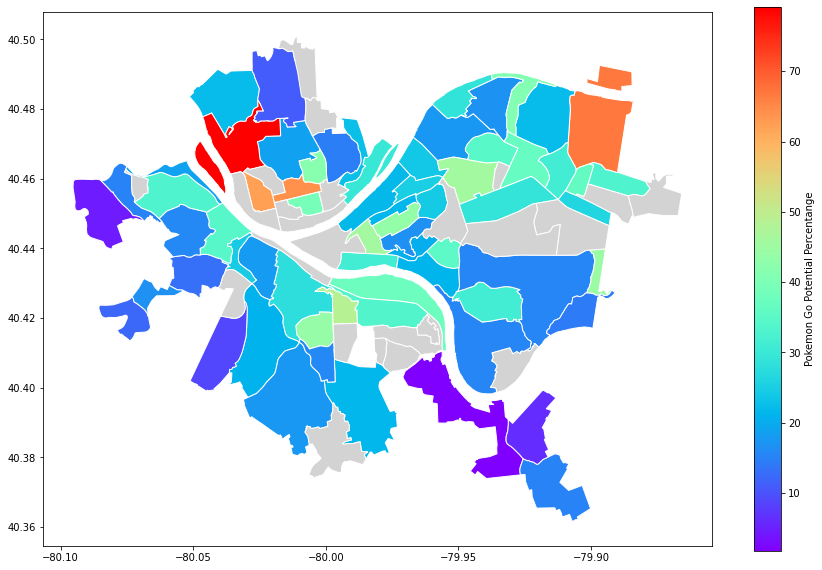

In [52]:
total_map = neighborhoods.merge(avOnly, how='left', left_on='hood', right_on='hood')
total_map.plot(column='Goodness',cmap='rainbow',edgecolor="white",legend=True,legend_kwds={'label': "Pokemon Go Potential Percentange"},figsize=(15, 10), 
               missing_kwds={"color": "lightgrey"})

---
## Conclusions

### Sam

As someone who doesn't live anywhere near Pittsburgh, I knew that for me to determine the best neighborhood here, I would have to use purely my imagination. Since I started living out here, I found myself playing Pokemon Go a lot more than I did in my suburban hometown, which is what made me think of Pokemon Go in the first place. I had a feeling pretty early on that Marshall-Shadeland would be the winner mainly because it was the winner in both the ISP data and the street sign data, which definitely gave it a lot of points in the eyes of the project. I've never actually been to Marshall-Shadeland, or most of the neighborhoods for that matter, but I am sure that it is a wonderful neighborhood with plenty of potential to play Pokemon Go. I feel that all of our data worked really well together and we were able to make a coherant project that fully states our motives and outcomes. Making each dataset be sorted per Acre definitely helped combining the three much easier becasue at that point it was just a simple task of putting them together in one equation. Putting each one per acre is also a great way to look at the density of each data topic, which was important for our specific metric. All in all, everything came together very well and we have a fantastic winner.

### Brian

When looking at our final combined data to determine the best neighborhood overall for Pokemon-go potential, I’m not surprised that Marshall-Shadeland took the spot because it was number one for both ISPs-Per-Acre and Signs-Per-Acre; however, when looking at just the Parks-Per-Acre, it is a little surprising because Allegheny Center was so much higher for that specific dataset. The ability for Marshall-Shadeland to still be ranked number one over Allegheny Center shows the effectiveness of our weighting system. Because all of our separate datasets-per-acre were of different scales (Mine from 0 to .12, Sams from 0 to .6, and Ryan’s from 0 to .8) we could not just take the averages right away. We had to divide every neighborhood score by the top one, just like curving test scores, in order to scale all of our datasets to a percentage based system, allowing us to then take the average scores, ensuring that each of the three metrics are equally weighted in the final determining calculation. Now, all that’s left is to go exploring and see how many Pokemon I can catch!

### Ryan